In [11]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.layers import LSTM

#  Load dataset

In [2]:
df = pd.read_csv("Data/daily-min-temperatures.csv")

In [3]:
df


,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8
...,...,...
3645,1990-12-27,14.0
3646,1990-12-28,13.6
3647,1990-12-29,13.5
3648,1990-12-30,15.7


# Only temperature column

In [4]:
temps = df['Temp'].values.reshape(-1,1)

# Normalize

In [5]:
scaler = MinMaxScaler(feature_range=(0,1))
temps_scaled = scaler.fit_transform(temps)

# Function to create sequences

In [6]:
def create_sequences(data, window_size=7):
    X, y = [], []
    for i in range(len(data)-window_size):
        X.append(data[i:i+window_size])
        y.append(data[i+window_size])
    return np.array(X), np.array(y)

window_size = 7
X, y = create_sequences(temps_scaled, window_size)


# Train-test split

In [7]:
split = int(len(X)*0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Step 2: Feedforward Neural Network (Baseline)

# Feedforward NN

In [9]:
ff_model = Sequential([
    Flatten(input_shape=(window_size,1)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)
])

ff_model.compile(optimizer='adam', loss='mse')
history_ff = ff_model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test), verbose=0)

C:\Python313\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


# Step 3: RNN (LSTM)

#  RNN with LSTM

In [12]:
rnn_model = Sequential([
    LSTM(50, input_shape=(window_size,1)),
    Dense(1)
])

rnn_model.compile(optimizer='adam', loss='mse')
history_rnn = rnn_model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test), verbose=0)


C:\Python313\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


# Step 4: Compare Results

#  Plot loss curves

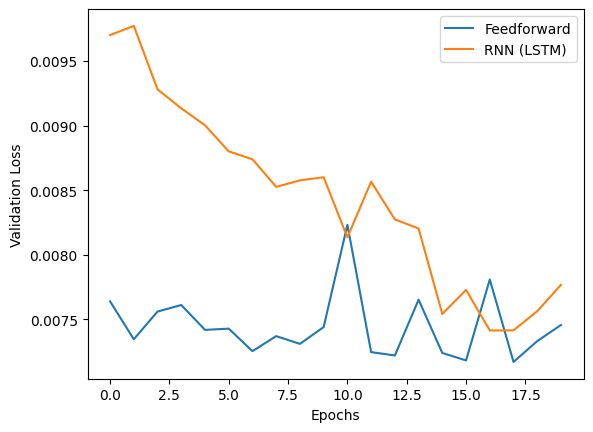

In [13]:
plt.plot(history_ff.history['val_loss'], label='Feedforward')
plt.plot(history_rnn.history['val_loss'], label='RNN (LSTM)')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()
plt.show()

#  Evaluate

In [14]:
ff_loss = ff_model.evaluate(X_test, y_test, verbose=0)
rnn_loss = rnn_model.evaluate(X_test, y_test, verbose=0)

print("Feedforward Test Loss:", ff_loss)
print("RNN (LSTM) Test Loss:", rnn_loss)

Feedforward Test Loss: 0.0074564930982887745
RNN (LSTM) Test Loss: 0.007767034228891134


# Step 5: Make Predictions

#  Predictions

In [15]:
ff_pred = ff_model.predict(X_test)
rnn_pred = rnn_model.predict(X_test)

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


# Inverse scaling

In [16]:
ff_pred_rescaled = scaler.inverse_transform(ff_pred)
rnn_pred_rescaled = scaler.inverse_transform(rnn_pred)
y_test_rescaled = scaler.inverse_transform(y_test)

# Plot predictions

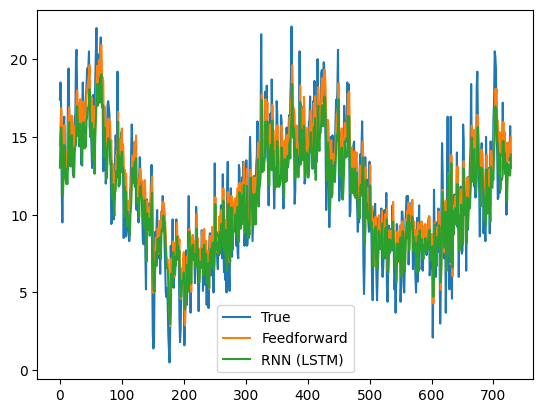

In [17]:

plt.plot(y_test_rescaled, label='True')
plt.plot(ff_pred_rescaled, label='Feedforward')
plt.plot(rnn_pred_rescaled, label='RNN (LSTM)')
plt.legend()
plt.show()

- RNNs (LSTMs) outperform Feedforward NNs on sequential time-series tasks.

- LSTMs leverage temporal dependencies, making them more suitable for predicting real-world data such as weather, stock prices, or sensor readings.